Полубаров Александр РТ5-61б. Лабораторная работа №3.

Задание:
Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. 
Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.).
Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
-обработку пропусков в данных;
-кодирование категориальных признаков;
-масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных

In [2]:
data = pd.read_csv('data/cwurData.csv', sep=",")

In [3]:
data.shape

(2200, 14)

In [4]:
data.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [5]:
data.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [6]:
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 2200


# 1. Обработка пропусков в данных

## 1.1. Простые стратегии - удаление или заполнение нулями

Удаление колонок, содержащих пустые значения

In [8]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((2200, 14), (2200, 13))

In [9]:
data_new_1.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012


Удаление строк, содержащих пустые значения

In [10]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((2200, 14), (2000, 14))

In [11]:
data_new_2.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014


Заполнение всех пропущенных значений нулями

In [12]:
data_new_3 = data.fillna(0)
data_new_3.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,0.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,0.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,0.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,0.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,0.0,18,85.21,2012


# 1.2. "Внедрение значений" - импьютация (imputation)

## 1.2.1. Обработка пропусков в числовых данных

In [13]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка broad_impact. Тип данных float64. Количество пустых значений 200, 9.09%.


In [14]:
data_num = data[num_cols]
data_num

,broad_impact
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2195,969.0
2196,981.0
2197,975.0
2198,975.0


E:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


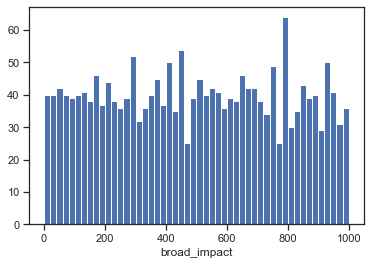

In [15]:
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [16]:
data[data['broad_impact'].isnull()]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,Australian National University,Australia,2,101,101,43,101,101,101,NaN,101,44.50,2013
196,97,University of Alberta,Canada,4,101,101,101,68,101,92,NaN,81,44.50,2013
197,98,University of Helsinki,Finland,1,69,101,81,74,79,71,NaN,101,44.39,2013
198,99,Paris Diderot University - Paris 7,France,5,28,101,72,101,87,101,NaN,101,44.36,2013


In [17]:
flt_index = data[data['broad_impact'].isnull()].index
flt_index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64', length=200)

In [18]:
data[data.index.isin(flt_index)]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,96,Australian National University,Australia,2,101,101,43,101,101,101,NaN,101,44.50,2013
196,97,University of Alberta,Canada,4,101,101,101,68,101,92,NaN,81,44.50,2013
197,98,University of Helsinki,Finland,1,69,101,81,74,79,71,NaN,101,44.39,2013
198,99,Paris Diderot University - Paris 7,France,5,28,101,72,101,87,101,NaN,101,44.36,2013


In [19]:
data_num[data_num.index.isin(flt_index)]['broad_impact']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
195   NaN
196   NaN
197   NaN
198   NaN
199   NaN
Name: broad_impact, Length: 200, dtype: float64

In [20]:
data_num_broad_impact = data_num[['broad_impact']]
data_num_broad_impact.head()

,broad_impact
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [21]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [22]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_broad_impact)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [23]:
strategies=['mean', 'median','most_frequent']

In [24]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_broad_impact)
    return data_num_imp[mask_missing_values_only]

In [25]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 496.6995, 496.6995, 496.6995,
        496.6995, 496.6995, 496.6995, 4

In [26]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 496., 496., 496., 496., 496., 496., 496., 496.,
        496., 496., 496., 4

In [27]:
strategies[2], test_num_impute(strategies[2])
#В моём случае все значения уникальны в пределах своего года, но отдельные вузы могут иметь одинаковое значение в разные года в зависимости от частоты ранжирования вуза, что делает эту стратегию нецелесообразной

('most_frequent',
 array([642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 642., 642., 642., 642., 642., 642., 642., 642., 642.,
        642., 642., 

In [28]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [29]:
data[['broad_impact']].describe()

,broad_impact
count,2000.000000
mean,496.699500
std,286.919755
min,1.000000
25%,250.500000
50%,496.000000
75%,741.000000
max,1000.000000


In [30]:
test_num_impute_col(data, 'broad_impact', strategies[0])

('broad_impact', 'mean', 200, 496.6995, 496.6995)

In [31]:
test_num_impute_col(data, 'broad_impact', strategies[1])

('broad_impact', 'median', 200, 496.0, 496.0)

In [32]:
test_num_impute_col(data, 'broad_impact', strategies[2])

('broad_impact', 'most_frequent', 200, 642.0, 642.0)

# 3. Масштабирование данных

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## 3.1. MinMax масштабирование

In [34]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['score']])

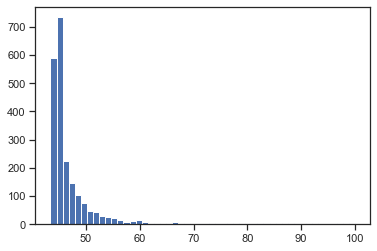

In [35]:
plt.hist(data['score'], 50)
plt.show()

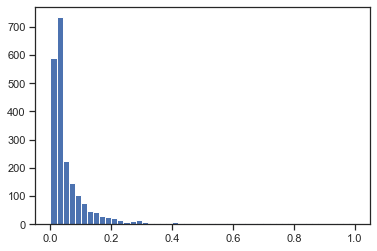

In [36]:
plt.hist(sc1_data, 50)
plt.show()

## 3.2. Масштабирование данных на основе Z-оценки - StandardScaler

In [37]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['score']])

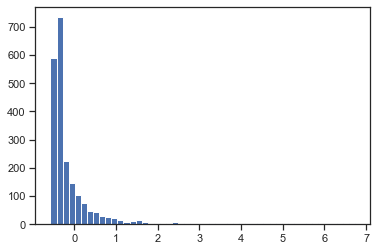

In [38]:
plt.hist(sc2_data, 50)
plt.show()

## 3.3. Нормализация данных

In [39]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['score']])

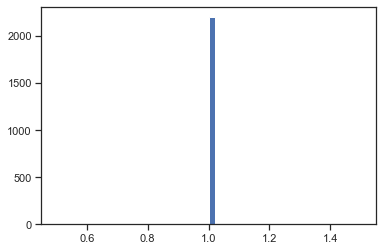

In [40]:
plt.hist(sc3_data, 50)
plt.show()